## explore the data 

In [157]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [158]:
import pandas as pd
#import the data from a csv-file
df = pd.read_csv('data/eda.csv')

In [159]:
df.describe()

,price,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,19206.00,21534.00,21597.00,21597.00,21597.00,21145.00,21597.00,17749.00,21597.00,21597.00,21597.00,21597.00,21597.00
mean,540296.57,4580474287.77,3.37,2.12,2080.32,15099.41,1.49,0.01,0.23,3.41,7.66,1788.60,291.86,1971.00,836.65,98077.95,47.56,-122.21,1986.62,12758.28
std,367368.14,2876735715.75,0.93,0.77,918.11,41412.64,0.54,0.09,0.77,0.65,1.17,827.76,442.49,29.38,4000.11,53.51,0.14,0.14,685.23,27274.44
min,78000.00,1000102.00,1.00,0.50,370.00,520.00,1.00,0.00,0.00,1.00,3.00,370.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,322000.00,2123049175.00,3.00,1.75,1430.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,450000.00,3904930410.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,645000.00,7308900490.00,4.00,2.50,2550.00,10685.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,7700000.00,9900000190.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,20150.00,98199.00,47.78,-121.31,6210.00,871200.00


In [160]:
df.shape
#(21597, 21)

(21597, 21)

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   id             21597 non-null  int64  
 3   bedrooms       21597 non-null  float64
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  float64
 6   sqft_lot       21597 non-null  float64
 7   floors         21597 non-null  float64
 8   waterfront     19206 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  float64
 13  sqft_basement  21145 non-null  float64
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17749 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

## Look into duplicate values 

In [162]:
df.duplicated().value_counts()



False    21597
Name: count, dtype: int64

&rarr; there are no duplicated values 

## Look into missing values 


<Axes: >

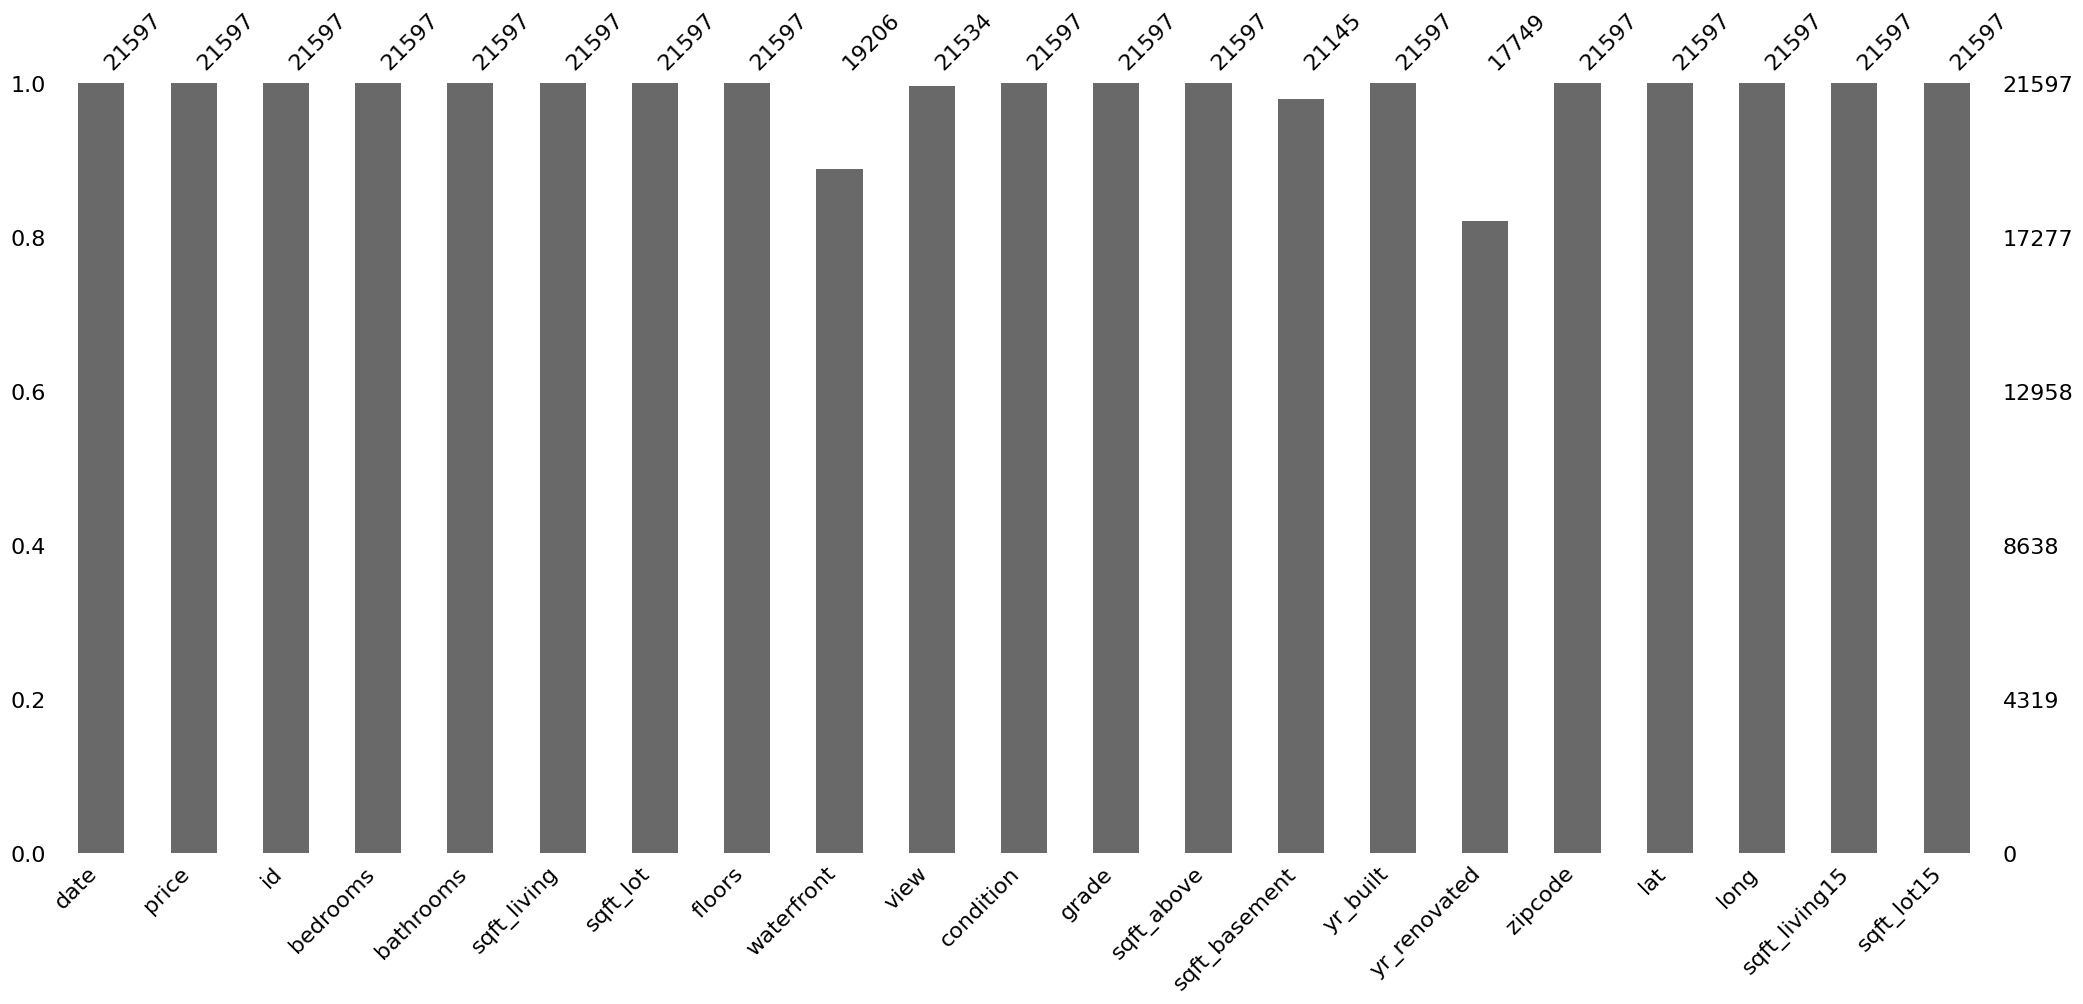

In [163]:
# import missingno
import missingno as msno
# display number of missing values per column
df.isna().sum()
# plotting percentage of missing values per column
msno.bar(df)

<Axes: >

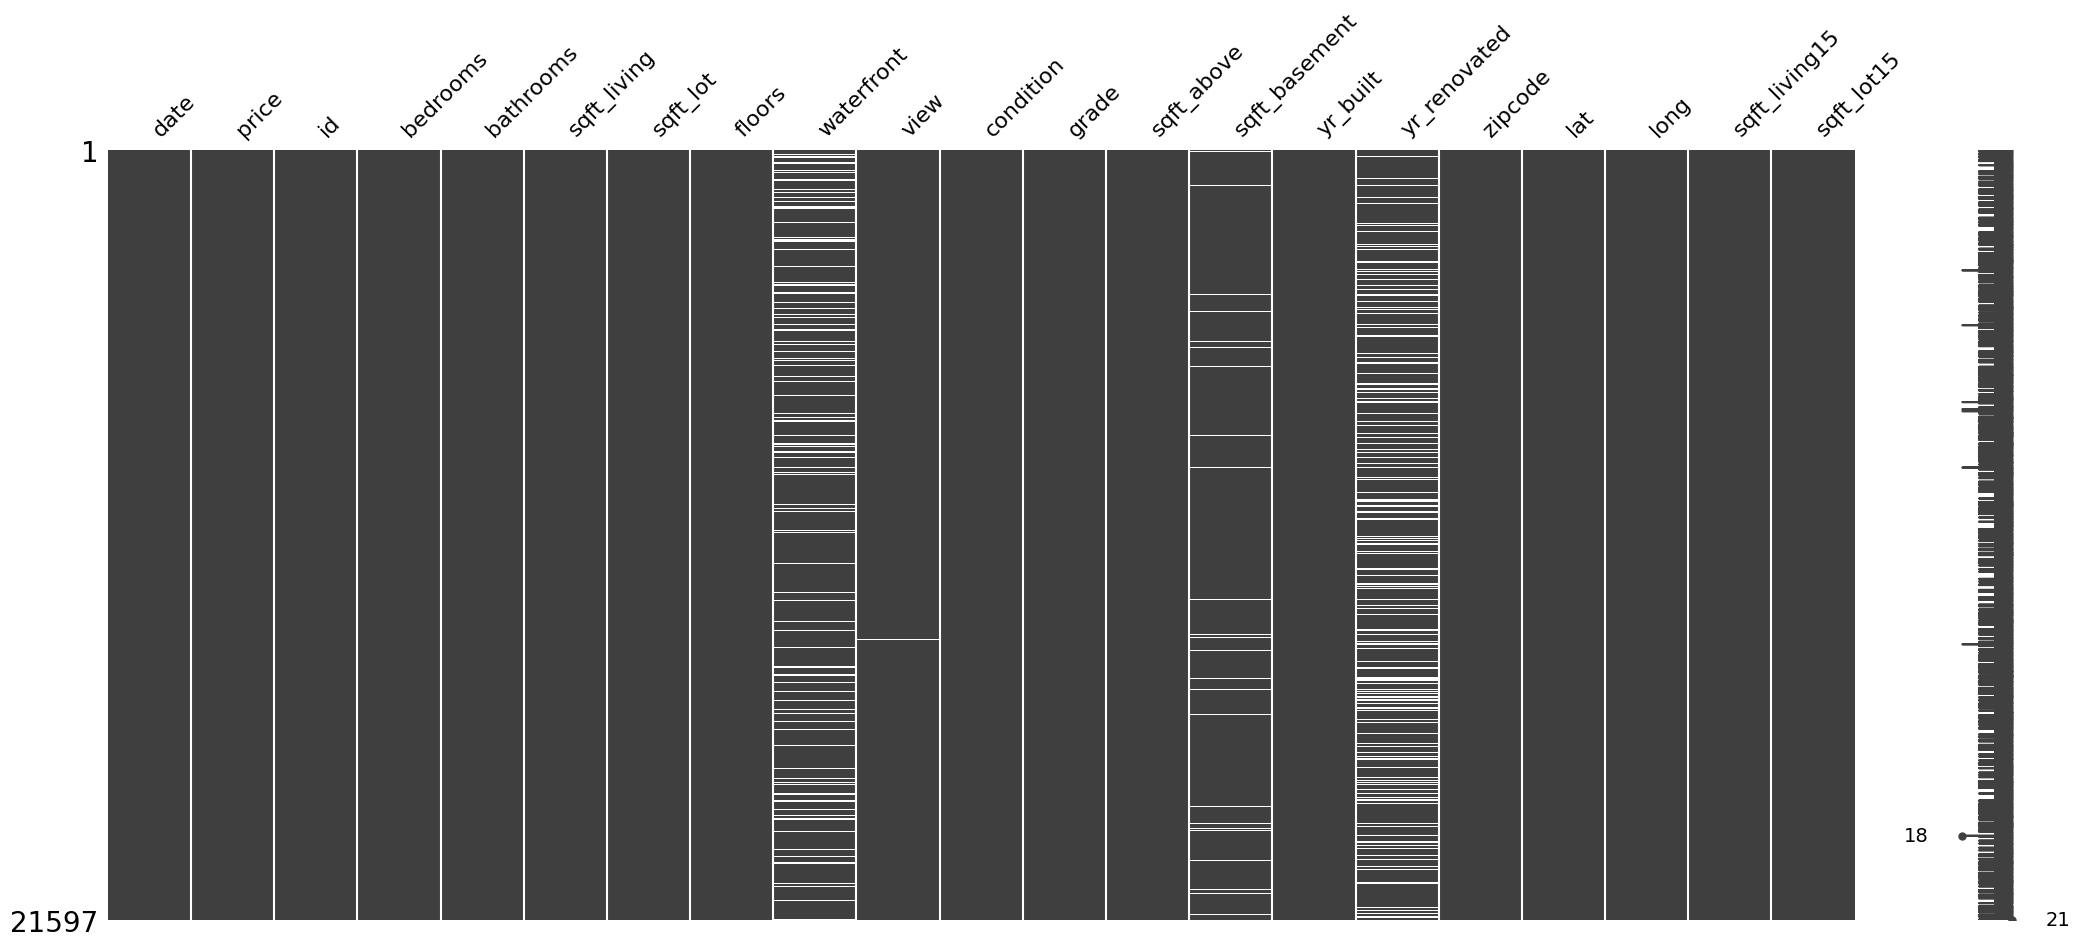

In [164]:
msno.matrix(df)

In [165]:
missing_values_count = df.isna().sum()

# Calculate the percentage of missing values per column
total_values = df.shape[0]  # Total number of rows in the DataFrame
percentage_missing_values = (missing_values_count / total_values) * 100

# Display the percentages of missing values per column
print("Percentage of missing values per column:")
print(percentage_missing_values)

Percentage of missing values per column:
date             0.00
price            0.00
id               0.00
bedrooms         0.00
bathrooms        0.00
sqft_living      0.00
sqft_lot         0.00
floors           0.00
waterfront      11.07
view             0.29
condition        0.00
grade            0.00
sqft_above       0.00
sqft_basement    2.09
yr_built         0.00
yr_renovated    17.82
zipcode          0.00
lat              0.00
long             0.00
sqft_living15    0.00
sqft_lot15       0.00
dtype: float64


The missing values are :
- waterfront      11.07%
- view             0.29%
- sqft_basement    2.09%
- yr_renovated     17.82%  : this is probably due to the fact that those properties where not renovated &rarr; i will be replacing those with 0


### replace the missing values

In [166]:
#replace all missing renovation years with 0/ it could also be replaced with construction date ?? would that be better ?
df['yr_renovated'].fillna(0, inplace=True)
#replace the view missing values with mean
df['view'].fillna(method='ffill', inplace=True)

In [167]:
df["waterfront"].unique()
# the output is ([nan,  0.,  1.])
# Replace NaN values with a separate category 
# (e.g., -1 or 'Unknown')
df['waterfront'].fillna(-1, inplace=True)


df["view"].unique()

array([0., 3., 4., 2., 1.])

Based on primary assumptions, the size of the basement does not seem to be important information and does not appear to add significant value. For now, I will choose to replace the missing values with the mean (average size). If this column is not needed in future analysis, it will be deleted.

In [168]:
mean_sqft_basement  = df['sqft_basement'].mean()
# Fill NaN values with the mean 
df['sqft_basement'].fillna(mean_sqft_basement , inplace=True)

### looking fo inconcistances in the data 

Some of the renovation years have an extra 0 and are greater than 2024, which is not logical at all.


In [169]:
df[df["yr_renovated"]>2024].count()

date             744
price            744
id               744
bedrooms         744
bathrooms        744
sqft_living      744
sqft_lot         744
floors           744
waterfront       744
view             744
condition        744
grade            744
sqft_above       744
sqft_basement    744
yr_built         744
yr_renovated     744
zipcode          744
lat              744
long             744
sqft_living15    744
sqft_lot15       744
dtype: int64

## Perform data transformations 

### Convert the dtaes from string to Date typs 

In [170]:
type(df['date'][0])

# the date is saved as a string 
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
type(df['date'][0])
# the data is now of type pandas._libs.tslibs.timestamps.Timestamp

pandas._libs.tslibs.timestamps.Timestamp

### Convert the view column from float to int 

In [171]:
# Convert float_column to int
df['view'] = df['view'].astype(int)

### Convert the   waterfront column from float to int 

In [172]:
# Convert float_column to int
df['waterfront'] = df['waterfront'].astype(int)

In [173]:
### Convert the yr renovated column from float to int 

In [174]:
# Convert float_column to int
df['yr_renovated'] = df['yr_renovated'].astype(int)

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   price          21597 non-null  float64       
 2   id             21597 non-null  int64         
 3   bedrooms       21597 non-null  float64       
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  float64       
 6   sqft_lot       21597 non-null  float64       
 7   floors         21597 non-null  float64       
 8   waterfront     21597 non-null  int32         
 9   view           21597 non-null  int32         
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  float64       
 13  sqft_basement  21597 non-null  float64       
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   2159

### Fix the renovation dates to make them more logical.


In [176]:
df['yr_renovated'] = df['yr_renovated'].apply(lambda x: x // 10 if len(str(x)) == 5 and str(x).endswith('0') else x)
df[df["yr_renovated"]>2024].count()

date             0
price            0
id               0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## Visualise the data

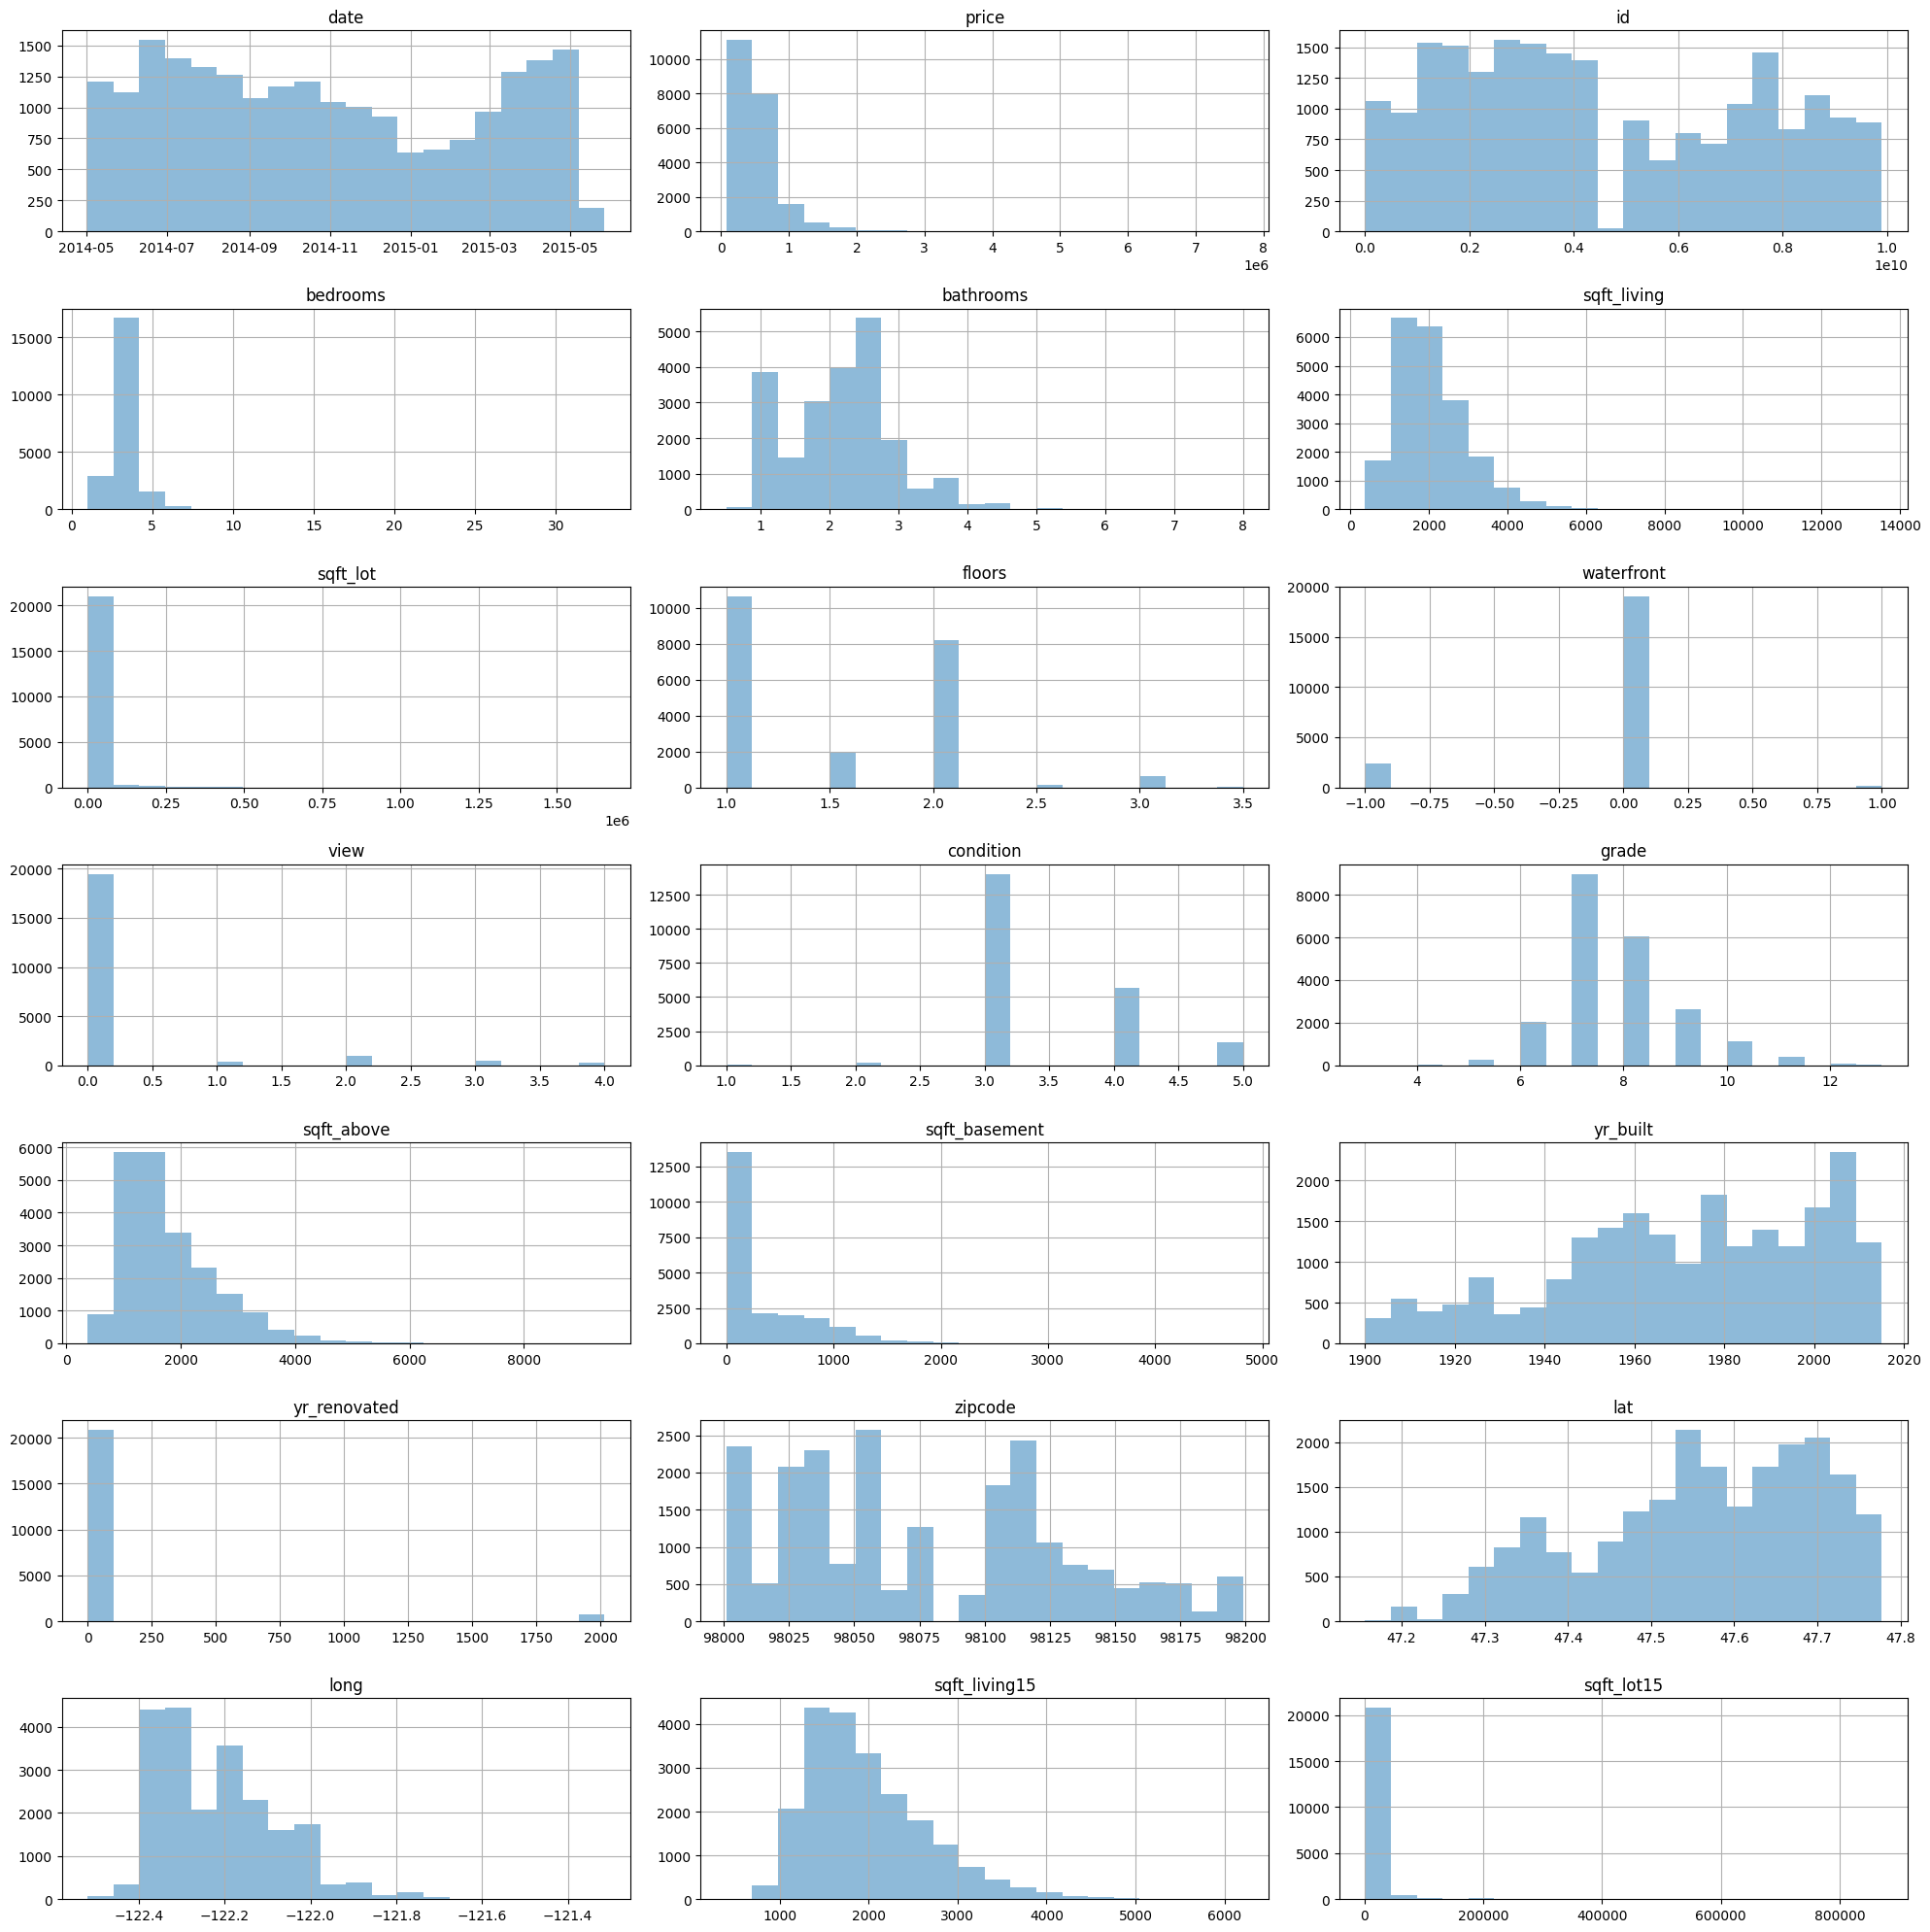

In [177]:

# Plot histograms with adjusted parameters
fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(20, 20))  # Adjust the figsize as needed
df.hist(ax=axes, bins=20, alpha=0.5)
plt.tight_layout()  # Adjust subplots to fit into the figure area.

# Show the plot
plt.show()

findfont: Font family 'Silom' not found.
findfont: Font family 'Silom' not found.
findfont: Font family 'Silom' not found.


<Axes: >

findfont: Font family 'Silom' not found.
findfont: Font family 'Silom' not found.
findfont: Font family 'Silom' not found.
findfont: Font family 'Silom' not found.


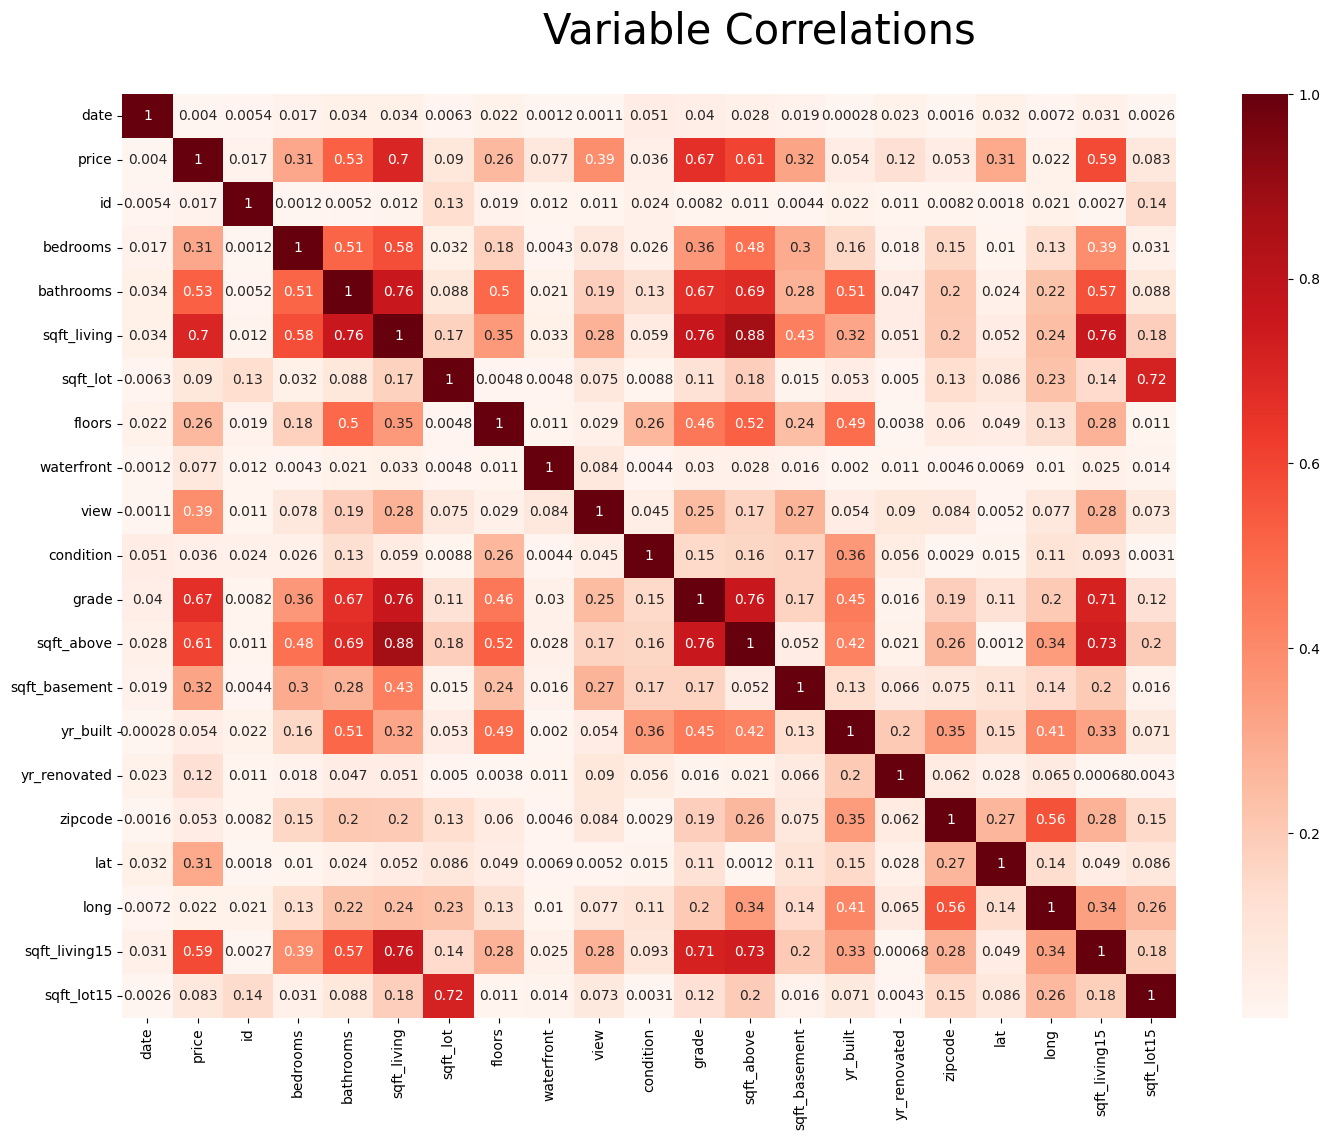

In [183]:
corr = df.corr().abs()
fig, ax=plt.subplots(figsize=(17,12))
fig.suptitle('Variable Correlations', fontsize=30, y=.95, fontname='Silom')
heatmap = sns.heatmap(corr, cmap='Reds', annot=True)
heatmap

In [184]:
price = df['price']
bath = df['bathrooms']
bed = df['bedrooms']
grade = df['grade']
sqft_living15 = df['sqft_living15']
floors = df['floors']
view = df['view']
sqft_living = df['sqft_living']
sqft_above = df['sqft_above']

findfont: Font family 'Silom' not found.
findfont: Font family 'Silom' not found.


<Figure size 800x500 with 0 Axes>

findfont: Font family 'Silom' not found.
findfont: Font family 'Silom' not found.
findfont: Font family 'Silom' not found.
findfont: Font family 'Silom' not found.
findfont: Font family 'Silom' not found.
findfont: Font family 'Silom' not found.
findfont: Font family 'Silom' not found.
findfont: Font family 'Silom' not found.


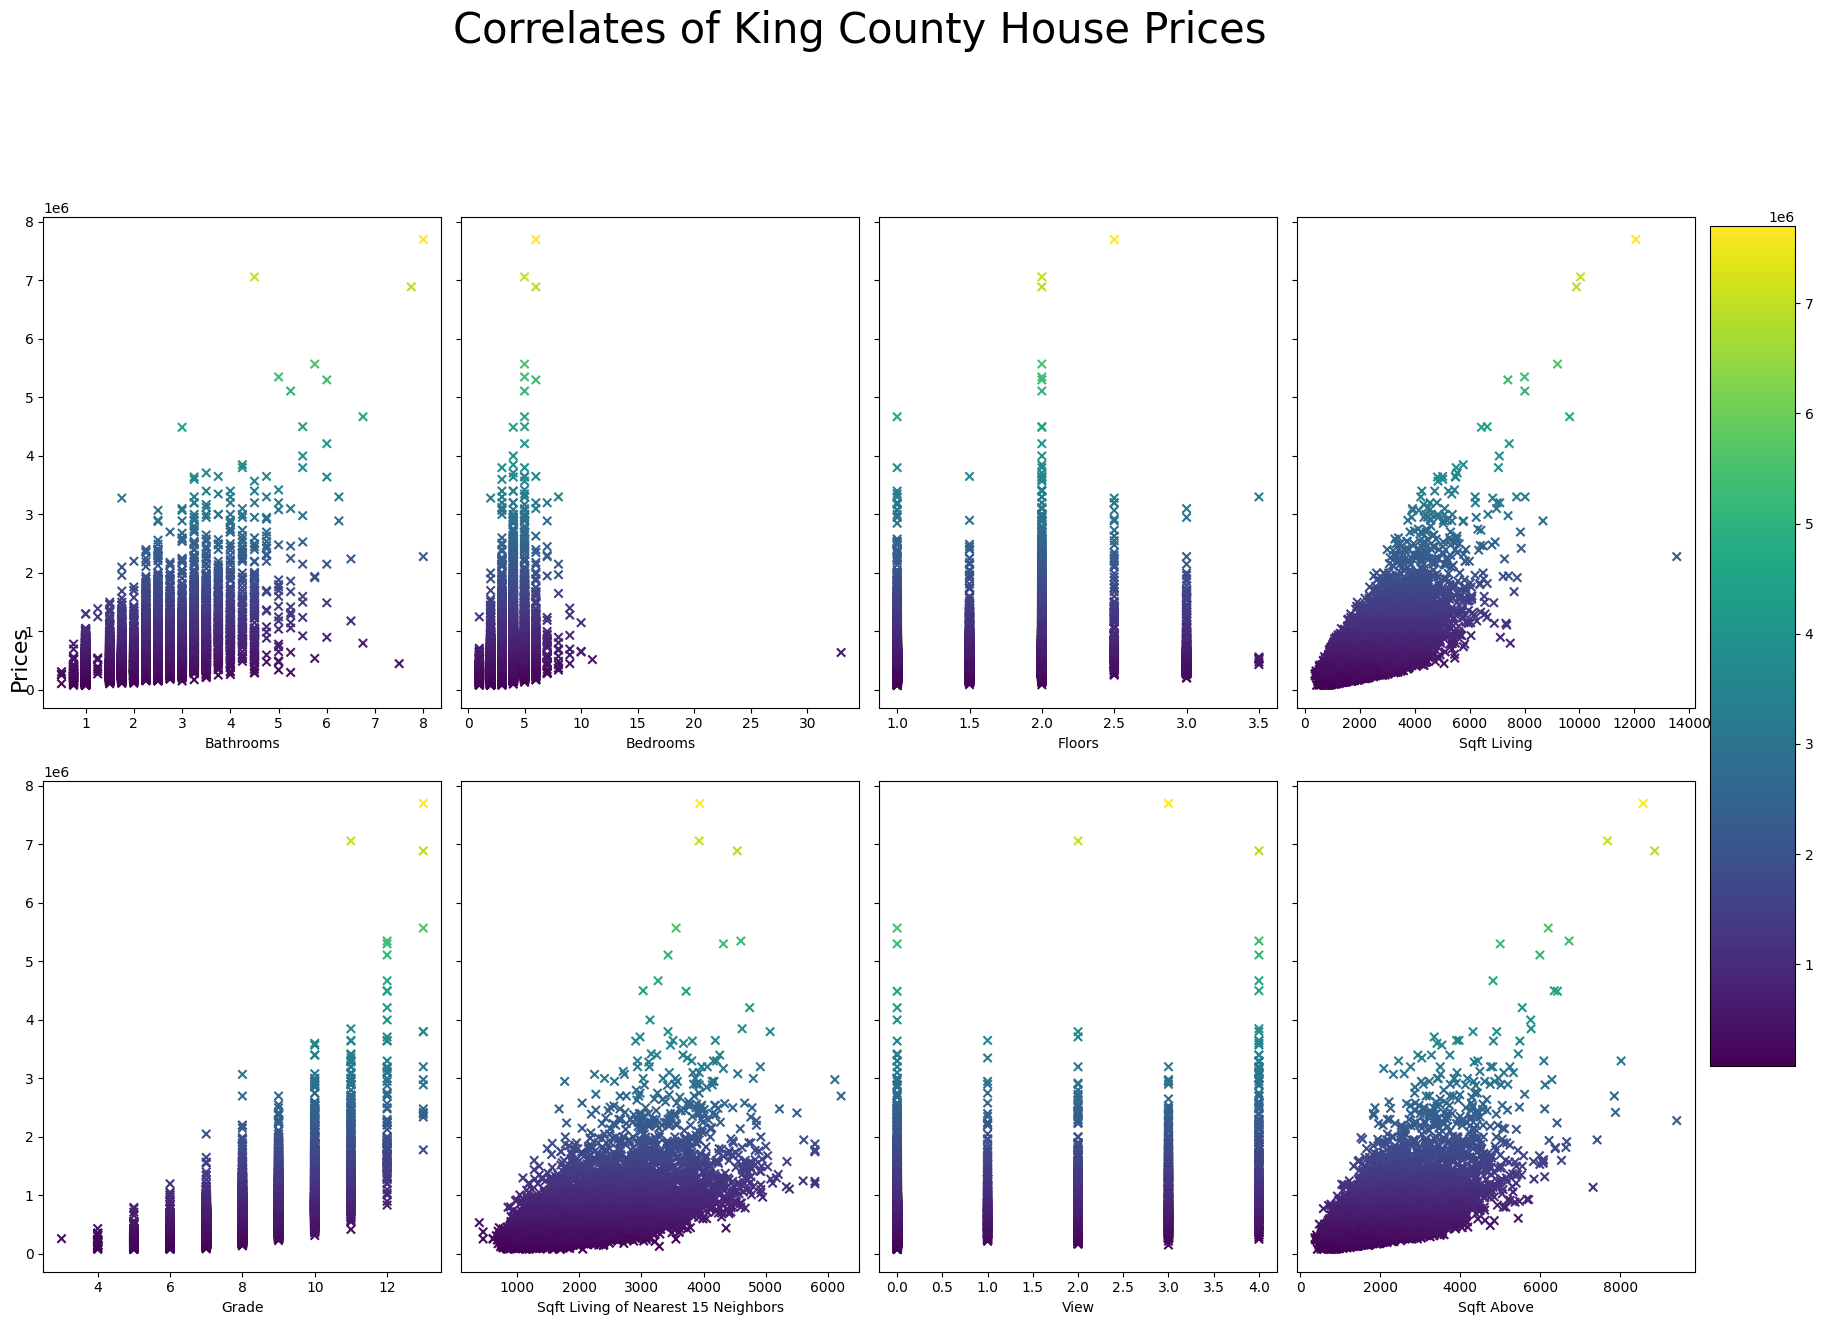

In [187]:
f = plt.figure()
f, axes = plt.subplots(nrows = 2, ncols = 4, sharex=False, sharey = True, figsize=(17,12))

f.suptitle('Correlates of King County House Prices', fontsize=30, y=1.1, fontname='Silom')
f.text(0.0001, 0.56, 'Prices', va='center', rotation='vertical', fontsize=16, fontname='Silom')

sc = axes[0][0].scatter(bath, price, c = price, marker = "x")
axes[0][0].set_xlabel('Bathrooms')

axes[0][1].scatter(bed, price, c = price, marker = "x")
axes[0][1].set_xlabel('Bedrooms')

axes[1][0].scatter(grade, price, c = price, marker = "x")
axes[1][0].set_xlabel('Grade')

axes[1][1].scatter(sqft_living15, price, c = price, marker = "x")
axes[1][1].set_xlabel('Sqft Living of Nearest 15 Neighbors')

axes[0][2].scatter(floors, price, c = price, marker = "x")
axes[0][2].set_xlabel('Floors')

axes[1][2].scatter(view, price, c = price, marker = "x")
axes[1][2].set_xlabel('View')

sc = axes[0][3].scatter(sqft_living, price, c = price, marker = "x")
axes[0][3].set_xlabel('Sqft Living')

sc = axes[1][3].scatter(sqft_above, price, c = price, marker = "x")
axes[1][3].set_xlabel('Sqft Above')

cbar_ax = f.add_axes([1, 0.22, 0.05, 0.7])

f.colorbar(sc, cax=cbar_ax)

f.tight_layout()
plt.show()

## define an expencive house

In [ ]:
mean_price = df['price'].mean()
median_price = df['price'].median()
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)

# Define expensive houses (above 75th percentile)
expensive_threshold = q3
expensive_houses = df[df['price'] > expensive_threshold]

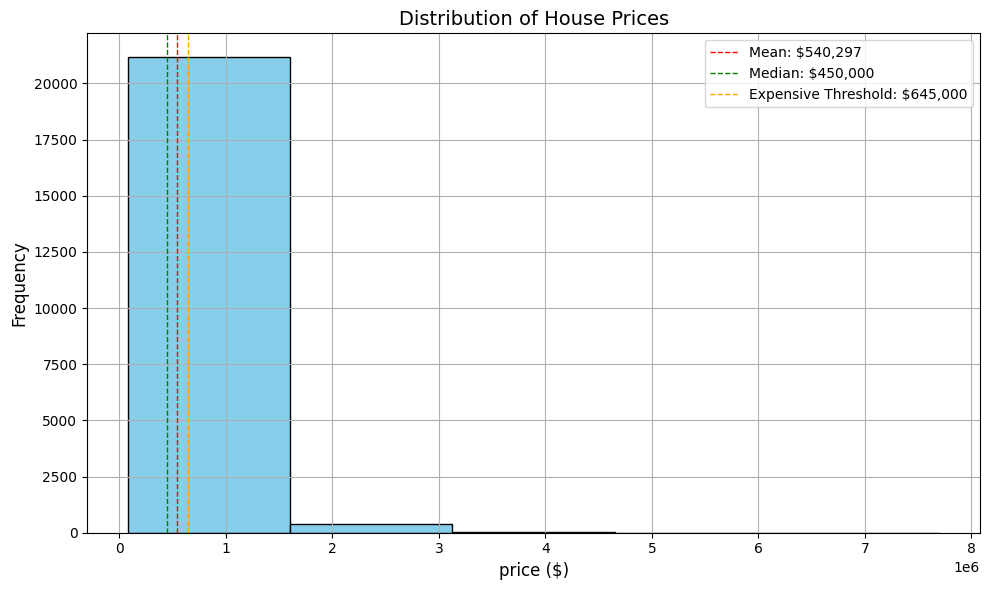


Expensive Houses:
            date      price          id  bedrooms  bathrooms  sqft_living  \
5     2014-05-12 1230000.00  7237550310      4.00       4.50      5420.00   
10    2015-04-03  662500.00  1736800520      3.00       2.50      3560.00   
15    2015-01-24  650000.00  9297300055      4.00       3.00      2950.00   
21    2014-08-26 2000000.00  2524049179      3.00       2.75      3050.00   
26    2014-06-26  937000.00  1794500383      3.00       1.75      2450.00   
...          ...        ...         ...       ...        ...          ...   
21580 2014-08-13  679950.00  7502800100      5.00       2.75      3600.00   
21581 2015-04-21 1580000.00   191100405      4.00       3.25      3410.00   
21583 2014-09-15  810000.00  7202300110      4.00       3.00      3990.00   
21584 2014-10-15 1540000.00   249000205      5.00       3.75      4470.00   
21590 2015-03-26 1010000.00  7936000429      4.00       3.50      3510.00   

       sqft_lot  floors  waterfront  view  ...  grade  s

In [192]:


# Plot house prices
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=5, color='skyblue', edgecolor='black')
plt.axvline(mean_price, color='red', linestyle='dashed', linewidth=1, label=f'Mean: ${mean_price:,.0f}')
plt.axvline(median_price, color='green', linestyle='dashed', linewidth=1, label=f'Median: ${median_price:,.0f}')
plt.axvline(expensive_threshold, color='orange', linestyle='dashed', linewidth=1, label=f'Expensive Threshold: ${expensive_threshold:,.0f}')
plt.xlabel('price ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of House Prices', fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



## Define central zip codes 

In [194]:
central_zipcodes = [
    '98101', '98104', '98121', '98122', '98109', '98119',  # Seattle Downtown and Central Area
    '98004', '98005', '98007', '98008', '98052',           # Bellevue and Eastside Areas
    '98040', '98039', '98033', '98034'                     # Other Central Areas
]

based on the zip code list and the expensive houses df we will create a new DF containing expensive houses in central areas 

In [195]:
central_area_houses = expensive_houses[expensive_houses['zipcode'].isin(central_zipcodes)]

now after getting the most expensive houses in the central are we are storing that in a new csv file that is going to be the base for the next steps 

In [197]:
central_area_houses.to_csv('data/central_area_expensive_houses.csv', index=False)